In [499]:
import pandas as pd
import pycountry
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path

In [468]:
dfolder = 'data/'

In [469]:
df = pd.read_csv(dfolder + 'merged.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/446111836.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dfolder + 'merged.csv')


In [470]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
df = df[df['year'] != 1920]


In [473]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
227,197901,AFG,1,1979,18.0,2.0,8.0,72.0,24.0,4.0,...,0.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
228,197901,AGO,1,1979,6.0,2.0,14.0,32.0,10.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
229,197901,AIA,1,1979,0.0,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
230,197901,ALB,1,1979,12.0,6.0,0.0,118.0,32.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
231,197901,ARE,1,1979,0.0,0.0,0.0,22.0,4.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6', 'count_events_7', 'count_events_8', 'count_events_9',
       'count_events_10', 'count_events_11', 'count_events_12',
       'count_events_13', 'count_events_14', 'count_events_15',
       'count_events_16', 'count_events_17', 'count_events_18',
       'count_events_19', 'count_events_20', 'count_events_1_gov',
       'count_events_2_gov', 'count_events_3_gov', 'count_events_4_gov',
       'count_events_5_gov', 'count_events_6_gov', 'count_events_7_gov',
       'count_events_8_gov', 'count_events_9_gov', 'count_events_10_gov',
       'count_events_11_gov', 'count_events_12_gov', 'count_events_13_gov',
       'count_events_14_gov', 'count_events_15_gov', 'count_events_16_gov',
       'count_events_17_gov', 'count_events_18_gov', 'count_events_19_gov',
       'count_events_20_gov', 'count_events_1_opp', 'count_events_2_o

In [475]:
cols = ['country', 'deaths', 'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']
for col in cols:
    pct_missing = df[col].isnull().sum() * 100 / len(df)
    print(f'{col}: {pct_missing}%')


country: 88.63761673386402%
deaths: 88.63761673386402%
state_deaths: 88.63761673386402%
nonstate_deaths: 88.63761673386402%
onesided_deaths: 88.63761673386402%
civilian_deaths: 88.63761673386402%


In [476]:
df_no_nan_country = df[df['country'].notna()]
df_no_nan_country

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23705,198901,COL,1,1989,54.0,30.0,44.0,180.0,42.0,4.0,...,0.0,14.0,4.0,0.0,Colombia,9.0,9.0,0.0,0.0,0.0
23722,198901,ETH,1,1989,36.0,52.0,74.0,254.0,76.0,12.0,...,0.0,4.0,2.0,0.0,Ethiopia,2716.0,2716.0,0.0,0.0,0.0
23728,198901,GBR,1,1989,1030.0,350.0,444.0,1522.0,360.0,94.0,...,6.0,0.0,0.0,0.0,United Kingdom,3.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115802,202303,THA,3,2023,2554.0,1570.0,1626.0,6782.0,1834.0,700.0,...,32.0,2.0,34.0,0.0,Thailand,2.0,2.0,0.0,0.0,0.0
115810,202303,TUR,3,2023,5276.0,2946.0,4304.0,14786.0,5360.0,1374.0,...,32.0,18.0,38.0,0.0,Turkey,1.0,1.0,0.0,0.0,0.0
115814,202303,UGA,3,2023,2102.0,1256.0,1160.0,3526.0,1514.0,380.0,...,14.0,8.0,30.0,0.0,Uganda,1.0,0.0,0.0,1.0,1.0
115815,202303,UKR,3,2023,25644.0,12548.0,14472.0,49040.0,16670.0,5434.0,...,112.0,42.0,124.0,0.0,Ukraine,829.0,829.0,0.0,0.0,170.0


In [477]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
227,197901,AFG,1,1979,18.0,2.0,8.0,72.0,24.0,4.0,...,0.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
228,197901,AGO,1,1979,6.0,2.0,14.0,32.0,10.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
229,197901,AIA,1,1979,0.0,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
230,197901,ALB,1,1979,12.0,6.0,0.0,118.0,32.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
231,197901,ARE,1,1979,0.0,0.0,0.0,22.0,4.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
# df['nonstate_deaths'].fillna(0, inplace=True)
# df['onesided_deaths'].fillna(0, inplace=True)
# df['civilian_deaths'].fillna(0, inplace=True)
# df['deaths'].fillna(0, inplace=True)
# df['state_deaths'].fillna(0, inplace=True)


In [479]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
227,197901,AFG,1,1979,18.0,2.0,8.0,72.0,24.0,4.0,...,0.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
228,197901,AGO,1,1979,6.0,2.0,14.0,32.0,10.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
229,197901,AIA,1,1979,0.0,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
230,197901,ALB,1,1979,12.0,6.0,0.0,118.0,32.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
231,197901,ARE,1,1979,0.0,0.0,0.0,22.0,4.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [480]:
def get_country_name(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None

df['country'] = df['isocode'].apply(get_country_name)

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/617527234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['isocode'].apply(get_country_name)


In [481]:
df.describe()

,MonthYear,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_16_opp,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
count,116076.000000,116076.000000,116076.000000,116076.000000,116076.000000,116076.000000,1.160760e+05,116076.000000,116076.000000,116076.000000,...,116076.000000,116076.000000,116076.000000,116076.000000,116076.000000,13189.000000,13189.000000,13189.000000,13189.000000,13189.0000
mean,200175.495081,6.472199,2001.690229,1783.070936,895.929202,915.125314,3.159971e+03,994.935973,285.636652,420.406647,...,2.019746,10.624177,8.799959,26.072814,0.113856,197.386838,107.555994,23.632952,66.197892,82.5381
std,1271.302439,3.453373,12.713639,15793.665757,8521.592242,7720.751509,2.506241e+04,8254.891150,2310.270656,4337.191641,...,12.230975,69.279364,53.795492,159.686711,1.366783,4586.487117,518.393653,155.780373,4546.355540,4550.7574
min,197901.000000,1.000000,1979.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,199105.000000,3.000000,1991.000000,14.000000,6.000000,8.000000,4.000000e+01,10.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0000
50%,200209.000000,6.000000,2002.000000,110.000000,52.000000,72.000000,2.820000e+02,74.000000,18.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,9.000000,0.000000,1.000000,3.0000
75%,201303.000000,9.000000,2013.000000,596.000000,278.000000,352.000000,1.320000e+03,372.000000,98.000000,116.000000,...,0.000000,4.000000,2.000000,6.000000,0.000000,100.000000,54.000000,2.000000,10.000000,18.0000
max,202305.000000,12.000000,2023.000000,634448.000000,345500.000000,311928.000000,1.008004e+06,352824.000000,86990.000000,177042.000000,...,852.000000,6644.000000,2370.000000,8722.000000,204.000000,522125.000000,25512.000000,7513.000000,521530.000000,521620.0000


In [482]:
#Stock function from class
def stock_simple(x: pd.Series, decay: float = 0.8):
    # xs is a stock of x inflow with a decay of 0.8
    x = list(x.fillna(0))
    xs = [] 
    for n in range(len(x)):
        if n == 0: 
            xs.append(x[n]) # stock starts in initial value
        else:
            xs.append(x[n] + decay * xs[n-1])
    return xs

#Decimal representation of topic share
columns_to_divide = [col for col in df.columns if col.startswith('count_events_')]

for col in columns_to_divide:
    df[col] = df[col] / 100

#Creating variable conflict
df['conflict'] =  0
df.loc[df['deaths'] >= 10, 'conflict'] = 1 #Threshold: 10 deaths

#Creating stock variables
# List of column prefixes
count_events_prefixes = ['count_events_' + str(i) for i in range(1, 21)]

# List of suffixes
suffixes = ['', '_gov', '_opp']

# Creating stock variables for each column
for prefix in count_events_prefixes:
    for suffix in suffixes:
        col_name = prefix + suffix
        if col_name in df.columns:
            df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
                                       .apply(lambda x: stock_simple(x))
                                       .explode().reset_index(drop=True))


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/151883213.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col] / 100
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/151883213.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conflict'] =  0
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/151883213.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [483]:
def make_target(df, t):
    # t is the number of periods for the shift

    # loop through each period and generate the shift variables
    for i in range(1, t+1):
        col_name = f'conflict_f{i}'
        df[col_name] = df.groupby('isocode')['conflict'].shift(-i)

    # take the maximum for t periods forward and create the new variable
    df['target_f{}'.format(t)] = df[[f'conflict_f{i}' for i in range(1, t+1)]].max(axis=1, skipna=False)

    # drop the shift variables
    df = df.drop(columns=[f'conflict_f{i}' for i in range(1, t+1)])

    # make the onset variable which ignores periods of ongoing conflict
    df['ons_target_f{}'.format(t)]=df['target_f{}'.format(t)]

    df.loc[df['conflict'] == 1, 'ons_target_f{}'.format(t)] = np.nan
    
    return(df)


In [484]:
df.conflict.nunique()

2

In [485]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6',
       ...
       'count_events_17_opp_stock', 'count_events_18_stock',
       'count_events_18_gov_stock', 'count_events_18_opp_stock',
       'count_events_19_stock', 'count_events_19_gov_stock',
       'count_events_19_opp_stock', 'count_events_20_stock',
       'count_events_20_gov_stock', 'count_events_20_opp_stock'],
      dtype='object', length=131)

In [486]:
def prepare_slice(count_events, year, month, dep, forward):
    
    data=df
    
    print(dep)
    print('pre drop ', len(data))
    
    #the future data is the data we use to produce the fitted values that are stored
    future = data.drop(data[(data.year != year) | (data.month != month)].index)	
    data = data.drop(data[((data.year > year)) | ((data.year == year) & (data.month >= month))].index)

    #make the target variable through the function above
    data = make_target(data, forward)
    
    print(year)
    print(month)

    #making one model
    fullmodel = []
      
    fullmodel.append('deaths')
    fullmodel.append('state_deaths')
    fullmodel.append('nonstate_deaths')
    fullmodel.append('onesided_deaths')
    fullmodel.append('civilian_deaths')

    for z in range(1, count_events + 1):
        this = 'count_events_' + str(z) + '_stock'
        fullmodel.append(this)
         
    together=[]
    for thang in fullmodel:
        together.append(thang)
        
    together.append('target_f{}'.format(forward))  # use the target variable created in make_target
    together.append('isocode')
    together.append('year')
    together.append('month')

    #model is the full or augmented model
    data2 = data[together]
    df1 = data2.dropna(how='any')
    print('post drop model', len(df1))
    df2 = df1['target_f{}'.format(forward)]  # use the target variable created in make_target
    #dependent variable for full model
    ys = df2.values.ravel()
    
    #now get the model back
    together.remove('target_f{}'.format(forward))  # use the target variable created in make_target
    
    #prepare out of sample for the models
    future2 = future[together]
    future_df1 = future2.dropna(how='any')

    #training data
    X = df1[fullmodel]
    
    #data at time T for producing fitted values
    X_future = future_df1[fullmodel]
    
    return ys, X, X_future, future_df1


In [487]:
gendata=1

for depths in [8]:
    for min_samples_leafs in [100]:
        print(f'Checking forward depth {depths} and minleafs {min_samples_leafs}')

        trees=700
        min_samples_splits=2
        
        forward=3
        count_events=20
        startyearid=2021
        deps=['ons_target_f{}'.format(forward)]

        search=0
        initialize=1

        if initialize==1:
            monthid=1
            #my_file = Path(readin + "forecast_data_forstudents.csv")
            data = df
            future = data.drop(data[(data.year != startyearid) | (data.month != monthid)].index)			
            fittedvalues=['isocode', 'year', 'month']
            fittedframe=future[fittedvalues]

            print(startyearid)
            print(monthid)
            y, X, X_future, future_model = prepare_slice(count_events, startyearid, monthid, deps, forward)

            # Assuming the future_model dataframe contains the following columns: 'isocode', 'year', 'month'
            fittedframe_future_top = future_model[fittedvalues]


Checking forward depth 8 and minleafs 100
2021
1
['ons_target_f3']
pre drop  116076
2021
1
post drop model 12047


In [489]:
X

,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,count_events_1_stock,count_events_2_stock,count_events_3_stock,count_events_4_stock,count_events_5_stock,...,count_events_11_stock,count_events_12_stock,count_events_13_stock,count_events_14_stock,count_events_15_stock,count_events_16_stock,count_events_17_stock,count_events_18_stock,count_events_19_stock,count_events_20_stock
23666,693.0,693.0,0.0,0.0,0.0,27.327531,14.218728,19.454658,79.442513,16.398591,...,13.577273,4.63584,2.074238,1.937219,0.170569,1.089762,7.555283,3.09041,9.560852,0.011022
23667,249.0,249.0,0.0,0.0,0.0,26.122025,14.354982,19.083727,78.554011,16.318872,...,12.481818,4.228672,1.81939,1.669775,0.136455,1.07181,7.064227,3.512328,9.048681,0.008818
23705,9.0,9.0,0.0,0.0,0.0,11.526384,8.161788,7.656217,41.097496,9.437388,...,4.392348,2.380141,1.11523,0.850932,0.177815,0.470253,5.222139,0.894563,5.072689,0.000018
23722,2716.0,2716.0,0.0,0.0,0.0,1.532334,0.509094,1.202451,9.54479,2.126161,...,0.722977,0.299572,0.132538,0.071937,0.032,0.26919,0.333268,0.07938,0.69621,0.0
23728,3.0,2.0,0.0,1.0,1.0,3.082646,1.473821,1.388009,11.607991,2.84072,...,1.662868,0.521987,0.191826,0.159812,0.217585,0.220365,0.528484,0.10767,0.681253,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108702,4.0,4.0,0.0,0.0,0.0,149.046149,87.601228,71.181954,262.350017,68.6404,...,75.005269,41.657468,14.688268,7.635803,4.691461,10.384271,43.453133,10.424638,46.805242,0.21745
108703,42.0,42.0,0.0,0.0,0.0,149.236919,86.120982,72.705564,273.460013,70.19232,...,73.944215,41.545975,14.690614,7.428643,5.673169,11.107417,42.982507,10.099711,45.884193,0.17396
108708,4.0,4.0,0.0,0.0,0.0,172.347042,90.693916,79.669631,303.261105,81.258092,...,89.934328,46.164409,18.847357,11.323978,8.901096,13.529566,49.86822,14.280257,76.990628,0.182123
108721,234.0,233.0,1.0,0.0,43.0,165.113201,82.66519,74.731627,267.840148,73.478009,...,79.961267,38.854147,15.486303,7.739148,5.607796,9.752281,47.412775,14.473604,55.455174,0.157483


In [492]:
future_model

,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,count_events_1_stock,count_events_2_stock,count_events_3_stock,count_events_4_stock,count_events_5_stock,...,count_events_14_stock,count_events_15_stock,count_events_16_stock,count_events_17_stock,count_events_18_stock,count_events_19_stock,count_events_20_stock,isocode,year,month
109437,2698.0,2661.0,7.0,30.0,97.0,9.620792,4.040684,8.499918,40.330684,10.839506,...,0.319484,0.685109,0.536306,2.733256,0.708112,3.434621,0.009982,AFG,2021,1
109438,10.0,0.0,0.0,10.0,10.0,9.356633,3.772547,8.759934,42.544547,10.311605,...,0.315587,0.748088,0.469045,2.286605,0.60649,3.307697,0.007985,AGO,2021,1
109450,1.0,1.0,0.0,0.0,1.0,7.203749,3.406264,7.566292,44.55497,11.093997,...,0.286788,0.401735,0.57529,3.357003,0.753023,4.392283,0.000549,AZE,2021,1
109451,4.0,0.0,0.0,4.0,4.0,7.102999,3.065011,8.393033,43.063976,16.035198,...,0.32943,0.541388,0.480232,3.045602,0.662418,4.053826,0.000439,BDI,2021,1
109454,62.0,36.0,10.0,16.0,16.0,8.813535,4.107686,8.213233,41.483156,12.418821,...,0.392668,0.929191,0.438679,3.898548,0.965558,4.944359,0.000225,BFA,2021,1
109455,1.0,0.0,1.0,0.0,0.0,13.150828,5.046149,11.950586,53.726525,13.935057,...,0.414135,2.863353,0.990943,4.698839,1.292446,7.055487,0.00018,BGD,2021,1
109464,292.0,0.0,292.0,0.0,6.0,12.578049,4.008764,13.012824,55.676926,13.96158,...,0.662749,0.901119,0.930848,5.965614,1.137011,5.658448,0.01764,BRA,2021,1
109469,162.0,155.0,0.0,7.0,18.0,10.964327,4.08108,11.676042,52.235895,13.165427,...,0.62757,0.501423,0.790652,5.211196,1.274112,4.254768,0.013972,CAF,2021,1
109475,83.0,43.0,3.0,37.0,45.0,10.094348,4.911456,13.773643,47.752936,15.570226,...,1.24996,0.226626,1.003418,6.290084,1.574494,2.898325,0.003663,CMR,2021,1
109476,182.0,61.0,38.0,83.0,94.0,10.635478,5.249165,12.918914,45.642349,15.476181,...,1.299968,0.281301,1.002735,7.192067,1.479595,3.57866,0.00293,COD,2021,1


In [496]:
def runsearch(Xs, ys):   
    print("going in")

    model = RandomForestClassifier()
    parameters = {'max_depth'         : [4, 8],
                  'min_samples_leaf'    : [50, 100],
                  'n_estimators': [700]}

    grid = GridSearchCV(return_train_score=True, estimator=model, param_grid = parameters, cv = 3, n_jobs=-1, scoring='roc_auc', verbose=2)
    grid.fit(Xs, ys)

    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.cv_results_)
    
    clf=RandomForestClassifier(**grid.best_params_)
    
    return clf

In [497]:
def setparams(treenumber, depthnumber, min_samples_number, min_samples_leaf_number):  
    print("setting parameters")
    print("they are:", treenumber, depthnumber, min_samples_number, min_samples_leaf_number)
    
    clf=RandomForestClassifier(n_estimators=treenumber,  max_depth =depthnumber, 
                               min_samples_split =min_samples_number, min_samples_leaf =  min_samples_leaf_number
                             ,n_jobs=8)
    return clf

In [498]:
gendata=1

depths = 8
trees = 700
min_samples_splits = 2
min_samples_leafs = 100
forward = 3
startyearid = 2021
deps = ['ons_target_f{}'.format(forward)]
initialize = 1
search = 0

# Initialize an empty dataframe for storing fitted values
fittedvalues=['isocode', 'year', 'month']
fittedframe = pd.DataFrame(columns=['isocode','year','month'])

for yearid in range(startyearid, 2024):
    if yearid<2023:
        maxmonth = 13
        print("before 2023, going till", maxmonth)
    else:
        maxmonth = 4
        print("in 2023, going till", maxmonth)

    for monthid in range(1, maxmonth):
        print(yearid)
        print(monthid)

        y, X, X_future, future_model = prepare_slice(count_events, yearid, monthid, deps, forward)
        fittedframe_future = future_model[fittedvalues]
        
        # Perform grid search or set parameters directly
        if search == 1:
            print("entering search")
            clf = runsearch(X, y)
        else:
            clf = setparams(trees, depths, min_samples_splits, min_samples_leafs)

        # Fit the model and make predictions
        clf.fit(X, y)
        res = clf.predict_proba(X_future)
        fittedframe_future[deps[0]+'_pred'] = res[:, 1]

        # Append the predictions to the fittedframe
        fittedframe = pd.concat([fittedframe, fittedframe_future])

gendata = 1
fittedframe.to_csv("{}_predictions.csv".format(deps[0]))


before 2023, going till 13
2021
1
['ons_target_f3']
pre drop  116076
2021
1
post drop model 12047
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
2
['ons_target_f3']
pre drop  116076
2021
2
post drop model 12084
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
3
['ons_target_f3']
pre drop  116076
2021
3
post drop model 12122
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
4
['ons_target_f3']
pre drop  116076
2021
4
post drop model 12157
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
5
['ons_target_f3']
pre drop  116076
2021
5
post drop model 12192
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
6
['ons_target_f3']
pre drop  116076
2021
6
post drop model 12230
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
7
['ons_target_f3']
pre drop  116076
2021
7
post drop model 12267
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
8
['ons_target_f3']
pre drop  116076
2021
8
post drop model 12308
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
9
['ons_target_f3']
pre drop  116076
2021
9
post drop model 12348
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
10
['ons_target_f3']
pre drop  116076
2021
10
post drop model 12388
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
11
['ons_target_f3']
pre drop  116076
2021
11
post drop model 12425
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
12
['ons_target_f3']
pre drop  116076
2021
12
post drop model 12463
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2022
1
['ons_target_f3']
pre drop  116076
2022
1
post drop model 12500
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
2
['ons_target_f3']
pre drop  116076
2022
2
post drop model 12535
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
3
['ons_target_f3']
pre drop  116076
2022
3
post drop model 12572
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
4
['ons_target_f3']
pre drop  116076
2022
4
post drop model 12608
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
5
['ons_target_f3']
pre drop  116076
2022
5
post drop model 12638
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
6
['ons_target_f3']
pre drop  116076
2022
6
post drop model 12678
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
7
['ons_target_f3']
pre drop  116076
2022
7
post drop model 12720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
8
['ons_target_f3']
pre drop  116076
2022
8
post drop model 12763
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
9
['ons_target_f3']
pre drop  116076
2022
9
post drop model 12804
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
10
['ons_target_f3']
pre drop  116076
2022
10
post drop model 12847
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
11
['ons_target_f3']
pre drop  116076
2022
11
post drop model 12889
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
12
['ons_target_f3']
pre drop  116076
2022
12
post drop model 12932
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


in 2023, going till 4
2023
1
['ons_target_f3']
pre drop  116076
2023
1
post drop model 12979
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
2
['ons_target_f3']
pre drop  116076
2023
2
post drop model 13023
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
3
['ons_target_f3']
pre drop  116076
2023
3
post drop model 13063
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


In [500]:
data = df

for deps in [['ons_target_f{}'.format(forward)]]:
    
    my_file = Path("{}_predictions.csv".format(deps[0]))

    predictions = pd.read_table(my_file, sep=',').iloc[:, 1:]

    # Select only rows where the prediction is not NaN
    fittedvalues = predictions.dropna(subset=['{}_pred'.format(deps[0])])

    # Merge the predictions into the original dataframe
    data = data.merge(fittedvalues, how='left', on=['isocode', 'year', 'month'])

# Add dependent variables again
combined = make_target(data, forward)
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116076 entries, 0 to 116075
Columns: 134 entries, MonthYear to ons_target_f3
dtypes: float64(68), int64(4), object(62)
memory usage: 119.6+ MB


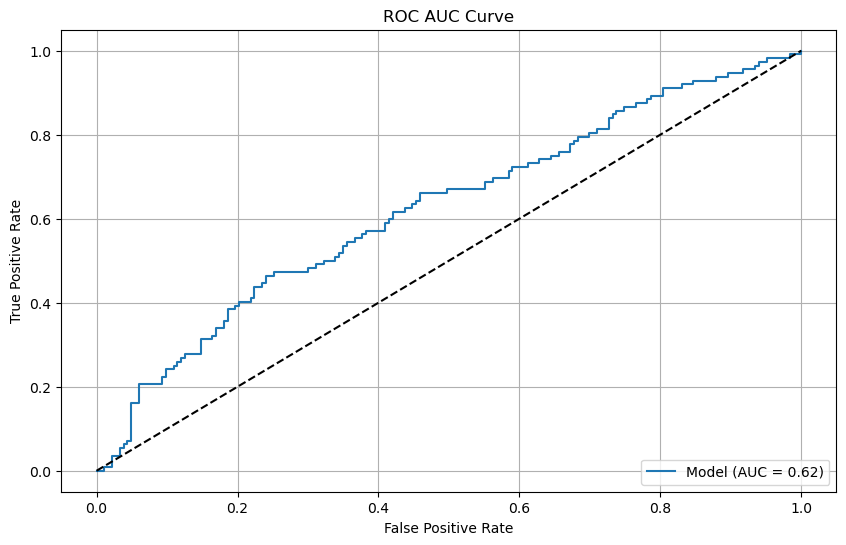

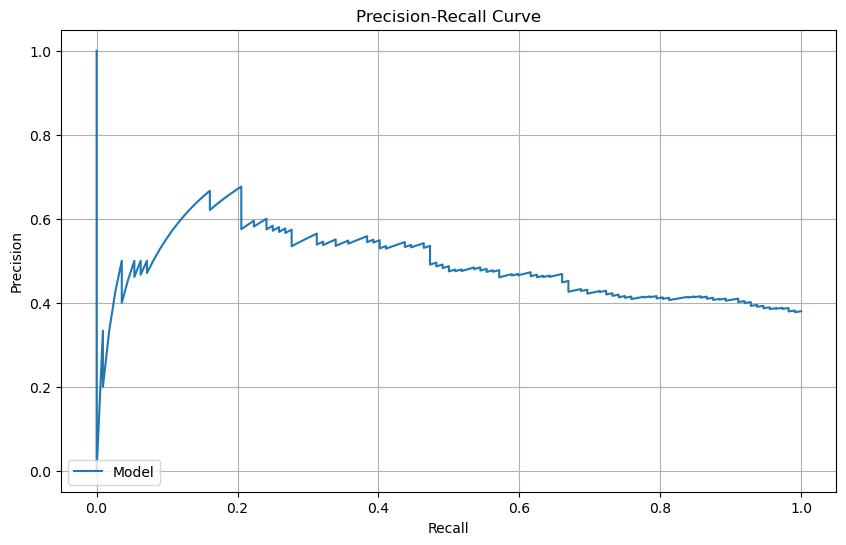

In [502]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# True labels (y_true)
y_true = combined['ons_target_f3']

# Predictions from your model
y_pred = combined['ons_target_f3_pred']

# Filter out rows with missing values
valid_indices = np.logical_not(np.isnan(y_true) | np.isnan(y_pred))
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]

# Calculate ROC AUC scores
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
